Sample Elimination

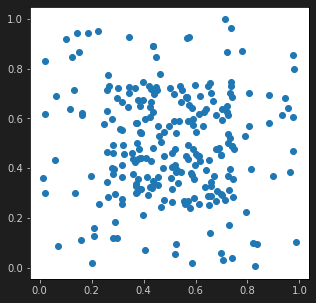

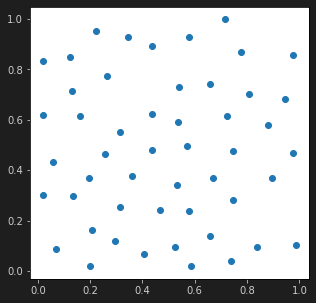

In [1]:
import numpy as np
import utils
from max_heap import MaxHeap
from scipy import spatial
from sklearn.metrics.pairwise import pairwise_distances
import math

np.random.seed(0)

inputNum = 250
outputNum = 50
initialSamples = np.concatenate((np.random.random((int(inputNum * 0.4), 2)), np.array([0.25, 0.25]) + 0.5 * np.random.random((int(inputNum * 0.6), 2))), axis=0)
utils.displayVecArray(initialSamples)

tree = spatial.KDTree(initialSamples)
weights = np.zeros(inputNum)

domainArea = 1.0 * 1.0 / outputNum
domainDimension = 2

rMax = math.sqrt(domainArea / (2 * math.sqrt(3)))
for i in range(inputNum):
    neighbourIndices = tree.query_ball_point(initialSamples[i], r = 2.0 * rMax)
    for neighbourIndex in neighbourIndices:
        squaredDistance = pairwise_distances([initialSamples[i]], [initialSamples[neighbourIndex]]).flatten()[0]
        weights[i] += utils.weightFunction(squaredDistance, 2.0 * rMax)

heap = MaxHeap()
heap.SetData(weights)
heap.Build()

outputSamples = []
remainSampleNum = inputNum
while remainSampleNum > outputNum:
    index = int(heap.GetTopItemID())
    heap.Pop()

    neighbourIndices = tree.query_ball_point(initialSamples[index], r = 2.0 * rMax)
    for neighbourIndex in neighbourIndices:
        if neighbourIndex != index:
            squaredDistance = pairwise_distances([initialSamples[index]], [initialSamples[neighbourIndex]]).flatten()[0]
            weights[neighbourIndex] -= utils.weightFunction(squaredDistance, 2.0 * rMax)
            heap.MoveItemDown(neighbourIndex)
    remainSampleNum -= 1

for i in range(outputNum):
    outputSamples.append(initialSamples[int(heap.GetIDFromHeap(i))])

utils.displayVecArray(outputSamples)

Sample Relaxation

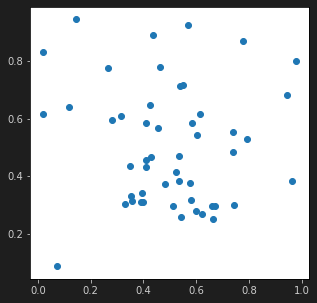

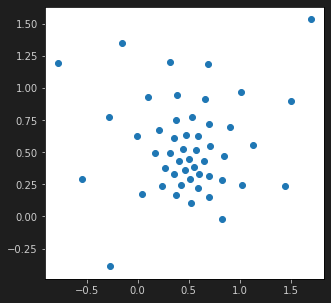

In [2]:
import numpy as np
import utils
from scipy import spatial
from sklearn.metrics.pairwise import pairwise_distances
import math

np.random.seed(0)
NearestNeighborCount = 5
IterationNum = 20
outputNum = 50
initialSamples = np.concatenate((np.random.random((int(outputNum * 0.4), 2)), np.array([0.25, 0.25]) + 0.5 * np.random.random((int(outputNum * 0.6), 2))), axis=0)
utils.displayVecArray(initialSamples)
outputSamples = np.copy(initialSamples)
for iterationIndex in range(IterationNum):
    tree = spatial.KDTree(outputSamples)
    for i in range(len(outputSamples)):
        sample = outputSamples[i]
        _, ii = tree.query(sample, NearestNeighborCount + 1)
        squaredRMax = 0
        for neighbourIndex in ii:
            squaredDistance = pairwise_distances([sample], [outputSamples[int(neighbourIndex)]]).flatten()[0]
            if squaredDistance > squaredRMax:
                squaredRMax = squaredDistance
        deltaX = np.array([0.0, 0.0])
        for neighbourIndex in ii:
            squaredDistance = pairwise_distances([sample], [outputSamples[neighbourIndex]]).flatten()[0]
            if squaredDistance < squaredRMax:
                movement = (1.0 / float(NearestNeighborCount)) * (sample - outputSamples[neighbourIndex]) * (math.sqrt(squaredRMax) / (math.sqrt(squaredDistance) + 1e-6) - 1.0)
                deltaX += movement
        sample += deltaX
        outputSamples[i] = sample
utils.displayVecArray(outputSamples)